# Import Relevant Packages

In [1]:
from __future__ import print_function
from csky.ipyconfig import *
from csky import bk, analysis, coord, dists, hyp, inj, llh, pdf, selections, trial, utils
import histlite as hl
import healpy as hp
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from icecube import astro

mp_cpus = 15

In [2]:
import sys
print (sys.path)

['', '/data/user/drysewyk/software/meta-projects/icerec/V05-02-00/build/lib', '/cvmfs/icecube.opensciencegrid.org/py2-v3.0.1/RHEL_7_x86_64/lib/python2.7/site-packages', '/home/drysewyk/llh_sandbox', '/data/user/drysewyk/software/external/skylab', '/cvmfs/icecube.opensciencegrid.org/py2-v3.0.1/RHEL_7_x86_64/lib/python27.zip', '/cvmfs/icecube.opensciencegrid.org/py2-v3.0.1/RHEL_7_x86_64/lib/python2.7', '/cvmfs/icecube.opensciencegrid.org/py2-v3.0.1/RHEL_7_x86_64/lib/python2.7/plat-linux2', '/cvmfs/icecube.opensciencegrid.org/py2-v3.0.1/RHEL_7_x86_64/lib/python2.7/lib-tk', '/cvmfs/icecube.opensciencegrid.org/py2-v3.0.1/RHEL_7_x86_64/lib/python2.7/lib-old', '/cvmfs/icecube.opensciencegrid.org/py2-v3.0.1/RHEL_7_x86_64/lib/python2.7/lib-dynload', '/home/drysewyk/.local/lib/python2.7/site-packages', '/mnt/lfs3/user/drysewyk/software/external/histlite', '/mnt/lfs3/user/drysewyk/software/external/csky', '/cvmfs/icecube.opensciencegrid.org/py2-v3.0.1/RHEL_7_x86_64/lib/python2.7/site-packages/IPy

# Load analysis data sets

In [3]:
ana_dir = utils.ensure_dir ('/data/user/drysewyk/csky_cache/ana')
repo = selections.mrichman_repo
# cp /data/user/mrichman/data/analyses/* ...
#repo = selections.Repository(local_root='/data/user/drysewyk/data/analyses',remote_root='/data/ana/analyses')

In [4]:
ana_7gfu = analysis.Analysis (repo, selections.PSDataSpecs.ps_7yr + selections.GFUDataSpecs.gfu_3yr, dir=ana_dir)
#ana.save(ana_dir)

Setting up Analysis for:
IC40, IC59, IC79, IC86_2011, IC86_2012_2014, GFU_2015_2017
Setting up IC40...
Reading /data/user/mrichman/data/analyses/ps_tracks/current/IC40_MC.npy ...
Reading /data/user/mrichman/data/analyses/ps_tracks/current/IC40_exp.npy ...
<- /data/user/drysewyk/csky_cache/ana/IC40.subanalysis.npy    
Setting up IC59...
Reading /data/user/mrichman/data/analyses/ps_tracks/current/IC59_MC.npy ...
Reading /data/user/mrichman/data/analyses/ps_tracks/current/IC59_exp.npy ...
<- /data/user/drysewyk/csky_cache/ana/IC59.subanalysis.npy    
Setting up IC79...
Reading /data/user/mrichman/data/analyses/ps_tracks/current/IC79_MC.npy ...
Reading /data/user/mrichman/data/analyses/ps_tracks/current/IC79_exp.npy ...
<- /data/user/drysewyk/csky_cache/ana/IC79.subanalysis.npy    
Setting up IC86_2011...
Reading /data/user/mrichman/data/analyses/ps_tracks/current/IC86_2011_MC.npy ...
Reading /data/user/mrichman/data/analyses/ps_tracks/current/IC86_2011_exp.npy ...
<- /data/user/drysewyk/c

In [5]:
ana_mese = analysis.Analysis (repo, selections.MESEDataSpecs.mesc_7yr_dnn, dir=ana_dir)

Setting up Analysis for:
MESC_2010_2016_DNN
Setting up MESC_2010_2016_DNN...
Reading /data/user/mrichman/data/analyses/mese/current/mese_cascades_MC_2013_dnn.npy ...
Reading /data/user/mrichman/data/analyses/mese/current/mese_cascades_2010_2016_dnn.npy ...
<- /data/user/drysewyk/csky_cache/ana/MESC_2010_2016_DNN.subanalysis.npy    
Done.


In [6]:
ana_tc = analysis.Analysis (repo, selections.PSDataSpecs.ps_7yr + selections.MESEDataSpecs.mesc_7yr_dnn, dir=ana_dir)

Setting up Analysis for:
IC40, IC59, IC79, IC86_2011, IC86_2012_2014, MESC_2010_2016_DNN
Setting up IC40...
<- /data/user/drysewyk/csky_cache/ana/IC40.subanalysis.npy    
Setting up IC59...
<- /data/user/drysewyk/csky_cache/ana/IC59.subanalysis.npy    
Setting up IC79...
<- /data/user/drysewyk/csky_cache/ana/IC79.subanalysis.npy    
Setting up IC86_2011...
<- /data/user/drysewyk/csky_cache/ana/IC86_2011.subanalysis.npy    
Setting up IC86_2012_2014...
<- /data/user/drysewyk/csky_cache/ana/IC86_2012_2014.subanalysis.npy    
Setting up MESC_2010_2016_DNN...
<- /data/user/drysewyk/csky_cache/ana/MESC_2010_2016_DNN.subanalysis.npy    
Done.


In [7]:
ana_7 = analysis.Analysis (repo, selections.PSDataSpecs.ps_7yr, dir=ana_dir)

Setting up Analysis for:
IC40, IC59, IC79, IC86_2011, IC86_2012_2014
Setting up IC40...
<- /data/user/drysewyk/csky_cache/ana/IC40.subanalysis.npy    
Setting up IC59...
<- /data/user/drysewyk/csky_cache/ana/IC59.subanalysis.npy    
Setting up IC79...
<- /data/user/drysewyk/csky_cache/ana/IC79.subanalysis.npy    
Setting up IC86_2011...
<- /data/user/drysewyk/csky_cache/ana/IC86_2011.subanalysis.npy    
Setting up IC86_2012_2014...
<- /data/user/drysewyk/csky_cache/ana/IC86_2012_2014.subanalysis.npy    
Done.


# Define functions

In [8]:
def get_llh (a, src):
    # space PDF - use default background space PDF and signal acceptance parameterization
    space_model = pdf.PointSourceSpacePDFRatioModel ( a, src, a.bg_space_param, a.acc_param )
    # energy PDF - use default parameterization
    energy_model = a.energy_pdf_ratio_model
    # put it together
    pdf_ratio_model = pdf.MultiPDFRatioModel (space_model, energy_model)
    N = len (a.data)
    llh_model = llh.LLHModel (pdf_ratio_model, N)
    return llh_model

def get_injs (a, llh_model, src, flux, cut_n_sigma):
    # note which event features we need
    keep = llh_model.pdf_ratio_model.keep
    # optimization: dec band cut
    selector = inj.DecBandSelector (src, cut_n_sigma=cut_n_sigma)
    # truth: unscrambled data, for unblinding
    truth = inj.DataInjector (a, selector (a.data), keep, randomizers=[])
    # bg: scrambled data
    randomizers = [inj.RARandomizer (), inj.PoleRandomizer (np.radians (30))]
    bg = inj.DataInjector (a, selector (a.data), keep, randomizers=randomizers)
    # sig: signal injection
    sig = inj.PointSourceInjector (a, src, flux, keep)
    return truth, bg, sig

def get_tr (src, ana=ana_7, flux=hyp.PowerLawFlux (2), use_energy=True, cut_n_sigma=5, sigsub=False, _fit_null=True, mp_cpus=mp_cpus):
    # get_llh needs the src list
    llh_kw = dict (src=src)
    # get_injs needs the src list and signal spectrum
    inj_kw = dict (src=src, flux=flux, cut_n_sigma=cut_n_sigma)
    # trial.get_trial_runner loops over sub analyses and gives a single TrialRunner
    return trial.get_trial_runner (
        ana, get_llh, get_injs, llh_kw=llh_kw, inj_kw=inj_kw, mp_cpus=mp_cpus)


def get_getters (ana=ana_7, extension=0, cut_n_sigma=3, sigsub=False):
    def get_tr_skymap (ra, dec, cut_n_sigma=3, _fit_null=True):
        src = utils.Sources (ra=ra, dec=dec, extension=extension)
        return get_tr (src, ana, cut_n_sigma=cut_n_sigma, sigsub=sigsub, _fit_null=_fit_null,)
    def get_selector (dec):
        return inj.DecBandSelector (utils.Sources (dec=dec, extension=extension))
    return get_tr_skymap, get_selector

In [9]:
# def get_llh (a, src):
#     # space PDF - use default background space PDF and signal acceptance parameterization
#     space_model = pdf.PointSourceSpacePDFRatioModel (
#         a, src, a.bg_space_param, a.acc_param)
#     # energy PDF - use default parameterization
#     energy_model = a.energy_pdf_ratio_model
#     # put it together
#     pdf_ratio_model = pdf.MultiPDFRatioModel (space_model, energy_model)
#     N = len (a.data)
#     llh_model = llh.LLHModel (pdf_ratio_model, N)
#     return llh_model

# def get_injs (a, llh_model, src, flux, cut_n_sigma):
#     # note which event features we need
#     keep = llh_model.pdf_ratio_model.keep
#     # optimization: dec band cut
#     selector = inj.DecBandSelector (src, cut_n_sigma=cut_n_sigma)
#     # truth: unscrambled data, for unblinding
#     truth = inj.DataInjector (a, selector (a.data), keep, randomizers=[])
#     # bg: scrambled data
#     randomizers = [inj.RARandomizer (), inj.PoleRandomizer (np.radians (30))]
#     bg = inj.DataInjector (a, selector (a.data), keep, randomizers=randomizers)
#     # sig: signal injection
#     sig = inj.PointSourceInjector (a, src, flux, keep)
#     return truth, bg, sig

# def get_tr (src, ana_mese, flux=hyp.PowerLawFlux (2), use_energy=True, cut_n_sigma=5, mp_cpus=mp_cpus):
#     # get_llh needs the src list
#     llh_kw = dict (src=src)
#     # get_injs needs the src list and signal spectrum
#     inj_kw = dict (src=src, flux=flux, cut_n_sigma=cut_n_sigma)
#     # trial.get_trial_runner loops over sub analyses and gives a single TrialRunner
#     return trial.get_trial_runner (
#         ana_mese, get_llh, get_injs, llh_kw=llh_kw, inj_kw=inj_kw, mp_cpus=mp_cpus)

# def get_tr_skymap (ra, dec, cut_n_sigma=5):
#     src = utils.Sources (ra=ra, dec=dec)
#     return get_tr (src, ana_mese, cut_n_sigma=cut_n_sigma)
# def get_selector (dec):
#     return inj.DecBandSelector (utils.Sources (dec=dec))

# def get_tr_tracks (src, ana7, flux=hyp.PowerLawFlux (2), use_energy=True, cut_n_sigma=5, mp_cpus=mp_cpus):
#     # get_llh needs the src list
#     llh_kw = dict (src=src)
#     # get_injs needs the src list and signal spectrum
#     inj_kw = dict (src=src, flux=flux, cut_n_sigma=cut_n_sigma)
#     # trial.get_trial_runner loops over sub analyses and gives a single TrialRunner
#     return trial.get_trial_runner (
#         ana7, get_llh, get_injs, llh_kw=llh_kw, inj_kw=inj_kw, mp_cpus=mp_cpus)

# def get_tr_skymap_tracks (ra, dec, cut_n_sigma=5):
#     src = utils.Sources (ra=ra, dec=dec)
#     return get_tr_tracks (src, ana7, cut_n_sigma=cut_n_sigma)

# def get_tr_tc (src, anatc, flux=hyp.PowerLawFlux (2), use_energy=True, cut_n_sigma=5, mp_cpus=mp_cpus):
#     # get_llh needs the src list
#     llh_kw = dict (src=src)
#     # get_injs needs the src list and signal spectrum
#     inj_kw = dict (src=src, flux=flux, cut_n_sigma=cut_n_sigma)
#     # trial.get_trial_runner loops over sub analyses and gives a single TrialRunner
#     return trial.get_trial_runner (
#         anatc, get_llh, get_injs, llh_kw=llh_kw, inj_kw=inj_kw, mp_cpus=mp_cpus)

# def get_tr_skymap_tc(ra, dec, cut_n_sigma=5):
#     src = utils.Sources (ra=ra, dec=dec)
#     return get_tr_tc (src, anatc, cut_n_sigma=cut_n_sigma)

In [10]:
sr_mese = trial.SkyScanner(*get_getters(ana = ana_mese,extension=np.radians(0)),mp_cpus=mp_cpus)
sr_tracks = trial.SkyScanner (*get_getters(ana=ana_7,extension=np.radians(0)), mp_cpus=mp_cpus)
sr_tc = trial.SkyScanner(*get_getters(ana_tc,extension = np.radians(0)), mp_cpus=mp_cpus)

#sr_mese = trial.SkyScanner (get_tr_skymap, get_selector, mp_cpus=mp_cpus)
#sr_tracks = trial.SkyScanner (get_tr_skymap_tracks, get_selector, mp_cpus=mp_cpus)
#sr_tc = trial.SkyScanner (get_tr_skymap_tc, get_selector, mp_cpus=mp_cpus)

In [11]:
#truth = sr_mese.get_one_trial (TRUTH=True)

In [12]:

#nside = 64
#npix = hp.nside2npix (nside)
#scan_zenith, scan_ra = hp.pix2ang (nside, np.r_[:npix])
#scan_dec = np.pi/2 - scan_zenith


In [13]:
#%time scan_ra, scan_dec, scan = sr_mese.get_one_scan_from_trial (scan_ra, scan_dec, truth)

In [14]:
scan_ra, scan_dec = sr_mese.get_healpix_grid (nside=64)
scan_l, scan_b = astro.equa_to_gal (scan_ra, scan_dec)
mask = (np.abs (scan_b) < np.radians (10))
%time scan_ra, scan_dec, scan = sr_mese.get_one_scan(scan_ra, scan_dec, TRUTH=True, mask=mask)

Scanning 8542 locations using 15 cores:
       8542/8542 coordinates complete.   
CPU times: user 119 ms, sys: 1.31 s, total: 1.43 s
Wall time: 20.7 s


In [15]:
scan_ra_tr, scan_dec_tr = sr_tracks.get_healpix_grid (nside=64)
scan_l_tr, scan_b_tr = astro.equa_to_gal (scan_ra_tr, scan_dec_tr)
mask_tr = (np.abs (scan_b_tr) < np.radians (10))
%time scan_ra_tr, scan_dec_tr, scan_tr = sr_tracks.get_one_scan(scan_ra_tr, scan_dec_tr, TRUTH=True, mask=mask_tr)

Scanning 8542 locations using 15 cores:
       8542/8542 coordinates complete.   
CPU times: user 1.66 s, sys: 1.73 s, total: 3.38 s
Wall time: 2min 8s


In [16]:
scan_ra_tc, scan_dec_tc = sr_tc.get_healpix_grid (nside=64)
scan_l_tc, scan_b_tc = astro.equa_to_gal (scan_ra_tc, scan_dec_tc)
mask_tc = (np.abs (scan_b_tc) < np.radians (10))
%time scan_ra_tc, scan_dec_tc, scan_tc = sr_tc.get_one_scan(scan_ra_tc, scan_dec_tc, mask=mask_tc)

Scanning 8542 locations using 15 cores:
       8542/8542 coordinates complete.   
CPU times: user 2.19 s, sys: 1.86 s, total: 4.05 s
Wall time: 2min 34s


In [17]:
def plot_result (v, clabel, title='', vmin=None, vmax=None, cmap='viridis', projection='aitoff'):
    if vmin is None:
        vmin = 0
    if vmax is None:
        vmax = np.ceil (v.max())
    fig, ax = plt.subplots (figsize=(8,6), subplot_kw=dict (projection=projection))
    sp = csp.SkyPlotter (pc_kw=dict (cmap=cmap, vmin=vmin, vmax=vmax))
    v = hp.ud_grade (v, 256)
    mesh, cb = sp.plot_map (ax, v, n_ticks=2, titleticks=bool (title))
    sp.plot_gp (ax, color='.5', lw=.5, alpha=.25)
    ax.grid (alpha=.5, ls='-')
    cb.set_label (clabel)
    ax.set_title (title)
    plt.tight_layout()
    return fig, ax

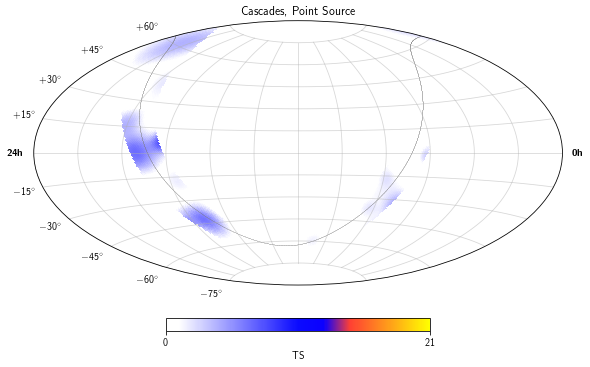

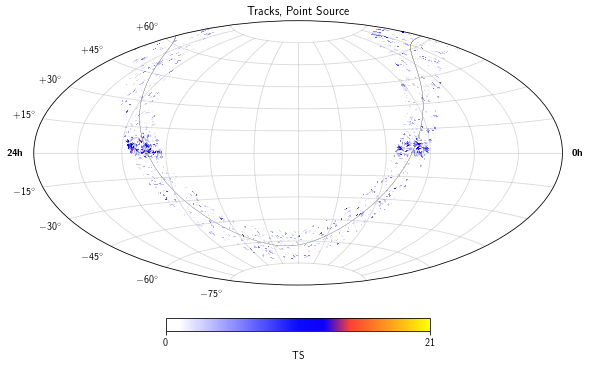

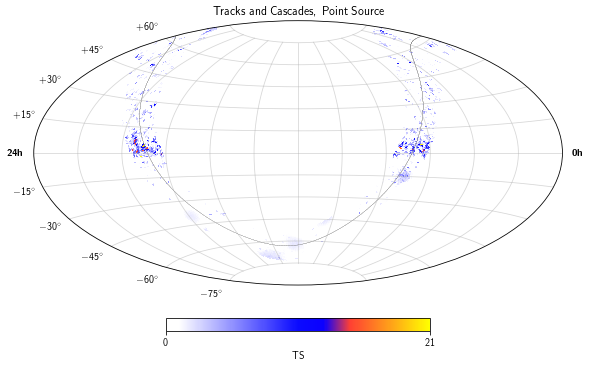

In [18]:
plot_result (scan[0], r'TS', title=r'Cascades, Point Source',
             projection='aitoff', cmap=csp.skymap_cmap, vmax=21);
plot_result (scan_tr[0], r'TS', title=r'Tracks, Point Source',
             projection='aitoff', cmap=csp.skymap_cmap, vmax=21);
plot_result (scan_tc[0], r'TS', title=r'Tracks and Cascades, Point Source',
             projection='aitoff', cmap=csp.skymap_cmap, vmax=21);